In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Utilities

In [3]:
def load_vector(filename):
    if not os.path.exists(filename):
        print(f"ERROR: File '{filename}' not found")
    else:
        with open(filename, "r") as file:
            # Read the entire file as a string
            file_contents = file.read()

        # Split and save values to list
        lines = file_contents.split("\n")
        list = [float(item) for item in lines]
        return list

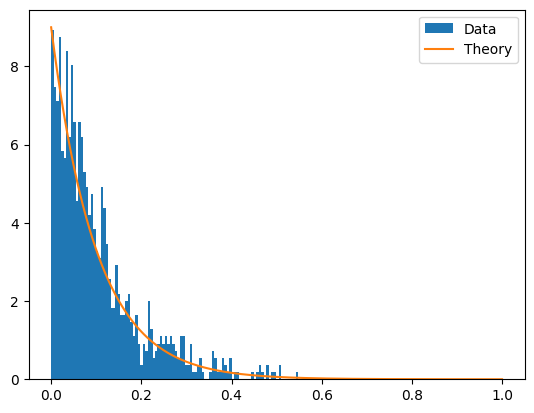

In [18]:
exp_lambda = np.array(load_vector("./data/test.txt"))
p = lambda lambda_C,t : np.exp(-lambda_C*t )
ts = np.linspace(0, 1, 1000)
ps = p(10, ts)*9

plt.hist(exp_lambda, bins=100, density=True, label="Data")
plt.plot(ts, ps, label="Theory")
plt.legend()

# Lotka-Volterra

## Different IC

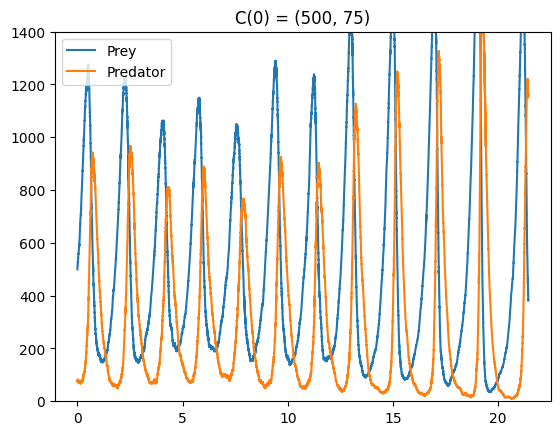

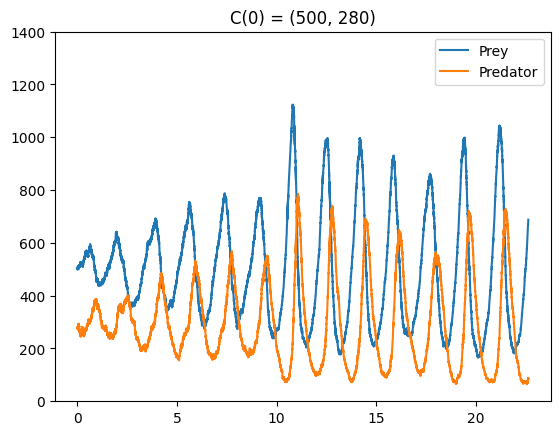

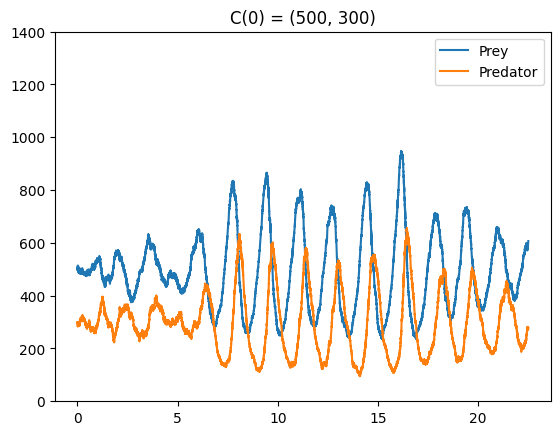

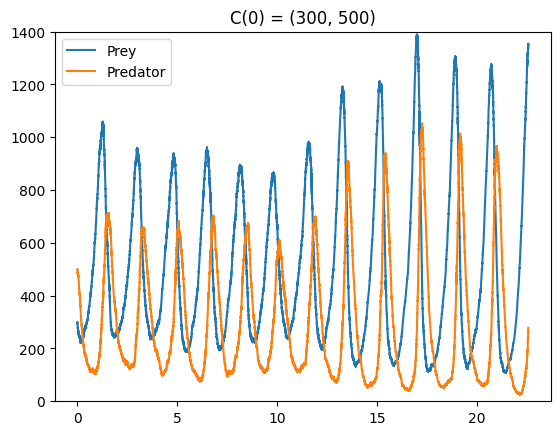

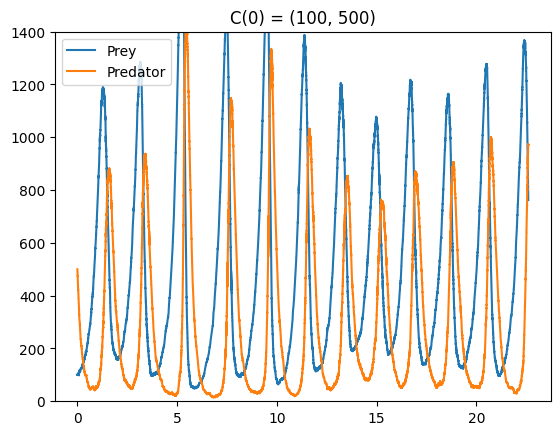

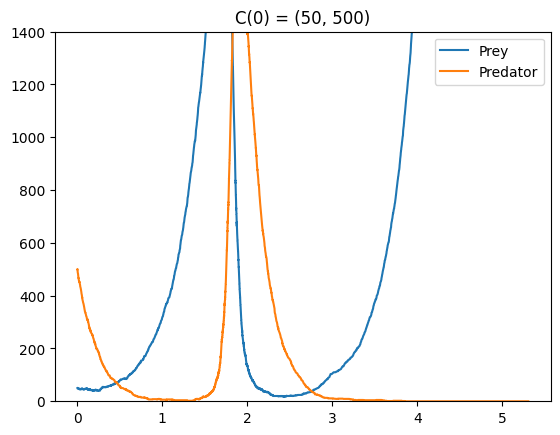

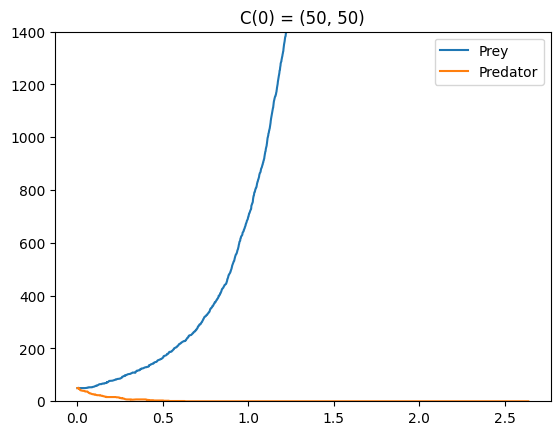

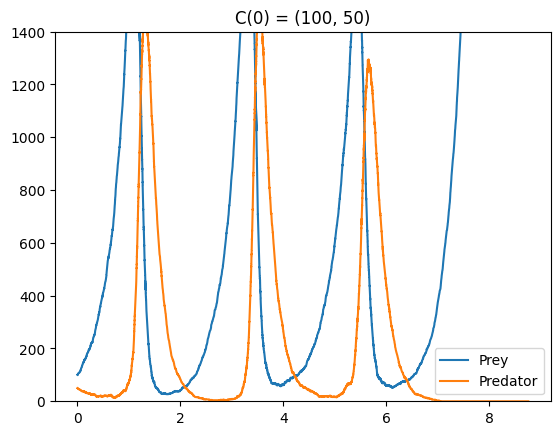

In [91]:
def plot_data(IC_prey, IC_predator, steps):
    x = steps
    filepath = "./data/change_IC/prey="+str(IC_prey)+"_pred="+str(IC_predator)+"/"
    A1_vec = np.array(load_vector(filepath+"A1_steps="+str(steps)+".txt"))[:x]
    A2_vec = np.array(load_vector(filepath+"A2_steps="+str(steps)+".txt"))[:x]
    t_vec  = np.array(load_vector(filepath+"t_steps="+str(steps)+".txt"))[:x]
    ts = np.linspace(0, 10, 10000)

    plt.plot(t_vec, A1_vec, label="Prey")
    plt.plot(t_vec, A2_vec, label="Predator")
    plt.title(f"C(0) = ({str(IC_prey)}, {str(IC_predator)})")
    plt.legend()
    plt.ylim(0,1400)
    plt.show()
plot_data(500,75,100000)
plot_data(500,280,100000)
plot_data(500,300,100000)
plot_data(300,500,100000)
plot_data(100, 500,100000)
plot_data(50,500,100000)
plot_data(50,50,100000)
plot_data(100,50,100000)

Changing the initial conditions could lead to the extinction of the predators, as in the cases with IC 
(preys,predators): (50,500), (50,50), (100,50)

To few preys to hunt for the predators lead to extinction in general

When the predators die out, the prey population increases towards infinity

## Change in parameters

Standard parameters

$K_1$ = 3

$K_2$ = 1/100

$K_3$ = 5

Tests ran with IC (500,280)

 Normal ks, 
C(0) = (500, 250)


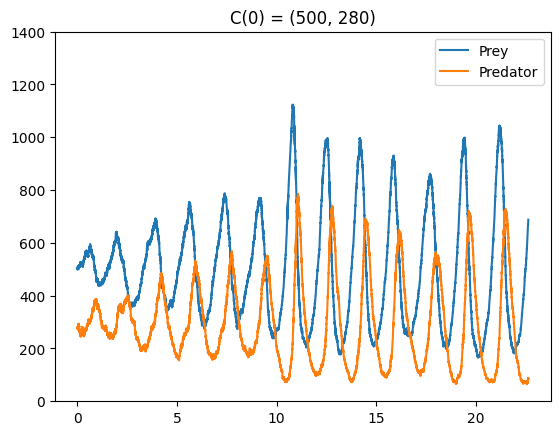

<function matplotlib.pyplot.show(close=None, block=None)>

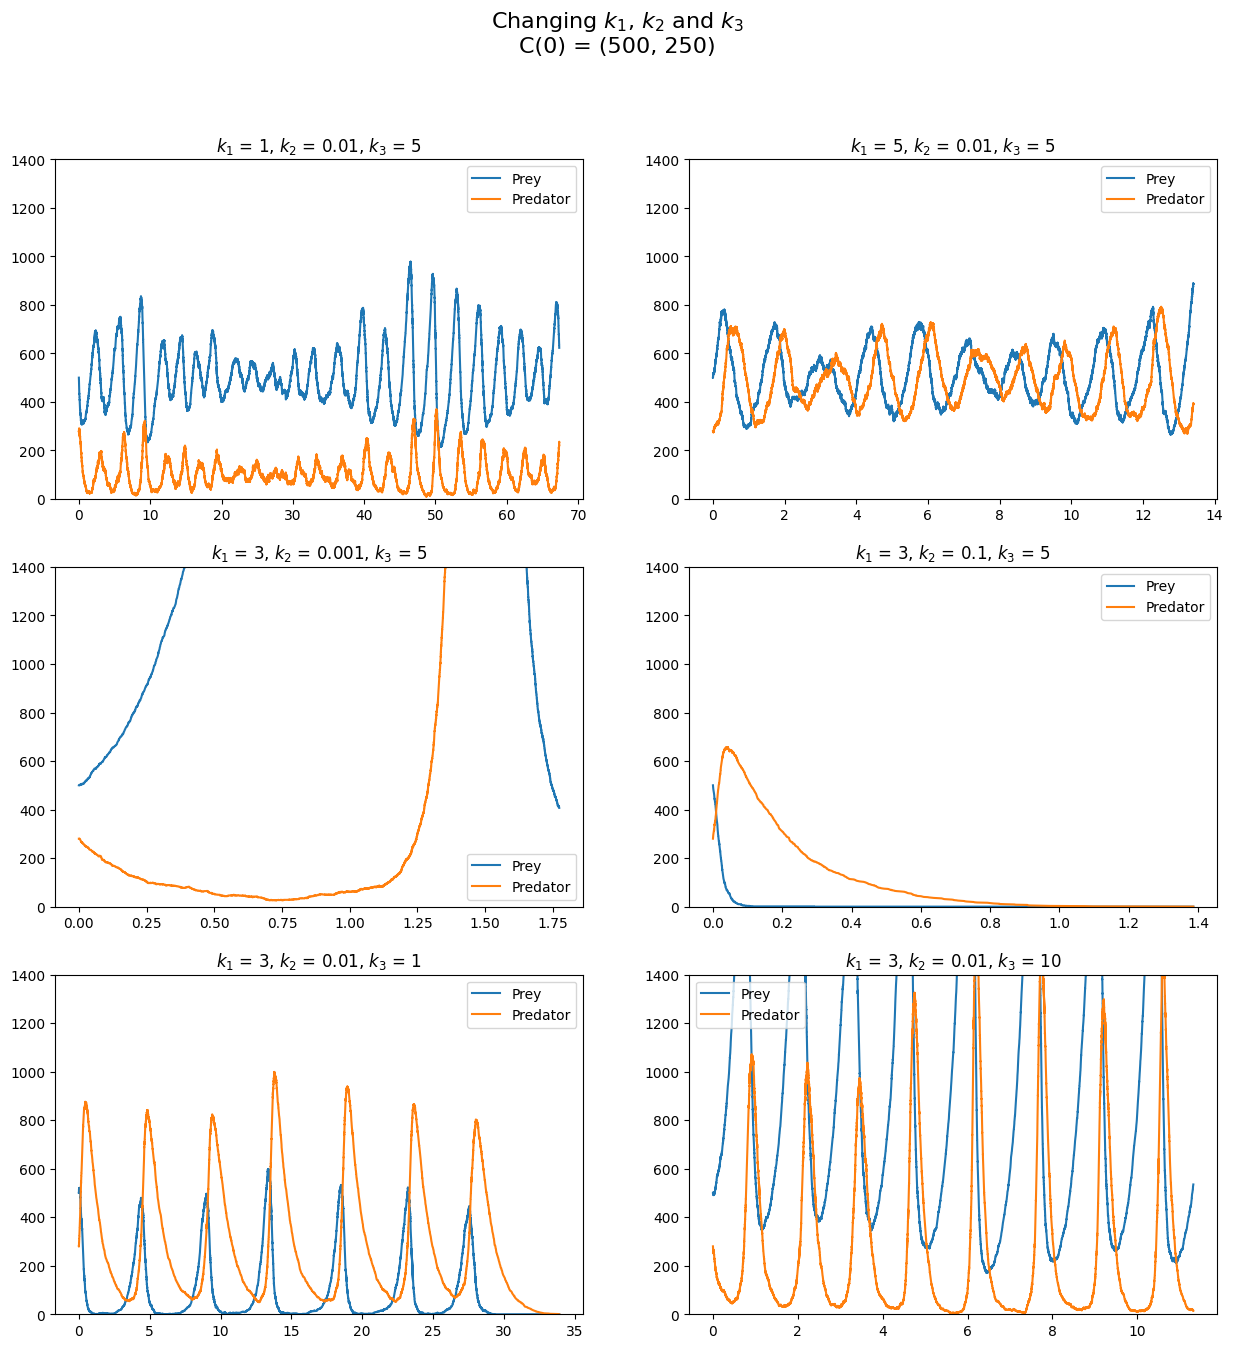

In [102]:
def plot_data_ks(k1, k2, k3, ax):
    steps = 100000
    x = steps
    k1_str = "{:.6f}".format(k1)
    k2_str = "{:.6f}".format(k2)
    k3_str = "{:.6f}".format(k3)
    filepath = f"data/change_ks/prey=500_pred=280/k1={k1_str}_k2={k2_str}_k3={k3_str}_steps="+str(steps)+"/"
    A1_vec = np.array(load_vector(filepath+"A1"))[:x]
    A2_vec = np.array(load_vector(filepath+"A2"))[:x]
    t_vec  = np.array(load_vector(filepath+"ts"))[:x]

    ax.plot(t_vec, A1_vec, label="Prey")
    ax.plot(t_vec, A2_vec, label="Predator")
    ax.set_title(r"$k_1$ = {}, $k_2$ = {}, $k_3$ = {}".format(k1, k2, k3))
    ax.legend()
    ax.set_ylim(0,1400)
print(f"Normal ks, \nC(0) = (500, 250)")
plot_data(500,280,100000)

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

fig.suptitle(r"Changing $k_1$, $k_2$ and $k_3$" + f"\nC(0) = (500, 250)", fontsize=16)
plot_data_ks(1, 0.01, 5, axes[0][0])
plot_data_ks(5, 0.01, 5, axes[0][1])
plot_data_ks(3, 0.001, 5, axes[1][0])
plot_data_ks(3, 0.1, 5, axes[1][1])
plot_data_ks(3, 0.01, 1, axes[2][0])
plot_data_ks(3, 0.01, 10, axes[2][1])

plt.show

#### $k_1$
Low birth rate leads to higher probability of extinction, as one can see the predator population scraping closing in on critically low values many times.

High birth rate prevents the extinction of predators, since the axes of predator food is very high at all times.
#### $k_2$
As one can see in the simulations, increasing the rate of killing quickly increases the predator populations, but since the kill so much, the prey population struggles to survive. This means that the predator population quickly diverges towards extinction as well.

Too low killing rate also almost leads the predators towards extinction in the start of the simulation, but if the prey population is large enough, the predators will also thrive because of the large amount of food..
#### $k_3$
Low death rate makes it easier for the predators to survive, but if the predators kill out all the prey, it becomes hard for the population to survuve in the long run

Too high death rate would make one think that the predators would die out quickly, but this makes it easier for the prey to increase in population, which again means more food for the predators stil alive.

# The brusselator

With a = 2 and b = 5

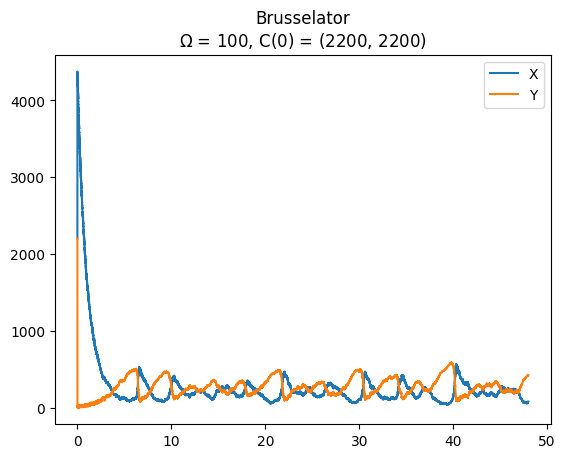

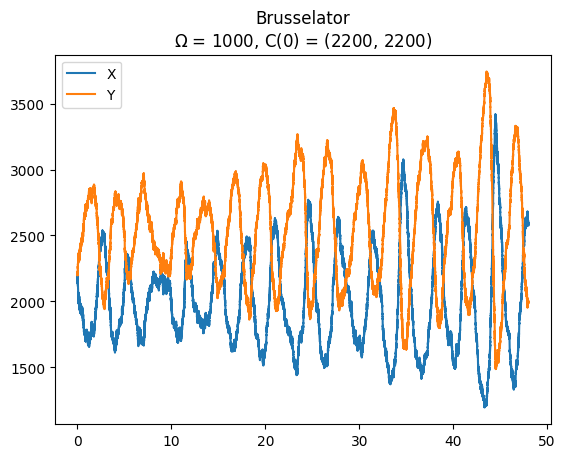

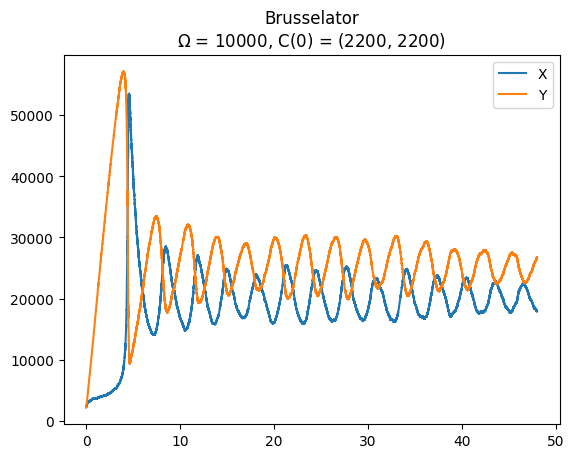

In [132]:
def plot_brusselator_48(IC_x, IC_y, omega):
    t_limit = 48
    filepath = f"./data/brusselator/t_limit/x={IC_x}_y={IC_y}_omega={omega}/"
    x_vec = np.array(load_vector(filepath+"Xs_tlimit={:.6f}.txt".format(t_limit)))
    y_vec = np.array(load_vector(filepath+"Ys_tlimit={:.6f}.txt".format(t_limit)))
    t_vec  = np.array(load_vector(filepath+"t_tlimit={:.6f}.txt".format(t_limit)))

    plt.plot(t_vec, x_vec, label="X")
    plt.plot(t_vec, y_vec, label="Y")
    plt.title(f"Brusselator\n" + r"$\Omega$ = " + str(omega) + f", C(0) = (" + str(IC_x) + ", " + str(IC_y) + ")")
    plt.legend()
    plt.show()

plot_brusselator_48(2200,2200,100)
plot_brusselator_48(2200,2200,1000)
plot_brusselator_48(2200,2200,10000)

In [135]:
def plot_x_y(x, y, omega, ax):
    t_limit = 48
    filepath = f"./data/brusselator/t_limit/x={x}_y={y}_omega={omega}/"
    x_vec = np.array(load_vector(filepath+"Xs_tlimit={:.6f}.txt".format(t_limit)))
    y_vec = np.array(load_vector(filepath+"Ys_tlimit={:.6f}.txt".format(t_limit)))
    t_vec  = np.array(load_vector(filepath+"t_tlimit={:.6f}.txt".format(t_limit)))

    ax.plot(x_vec, y_vec, label="time development", linewidth=0.5, zorder = 1)
    ax.scatter(x_vec[0], y_vec[0], label="C(0)", color="black", s=100, zorder = 2)
    ax.set_title(f"Brusselator\n" + r"$\Omega$ = " + str(omega) + f", C(0) = (" + str(x) + ", " + str(y) + ")")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()


plt.show()



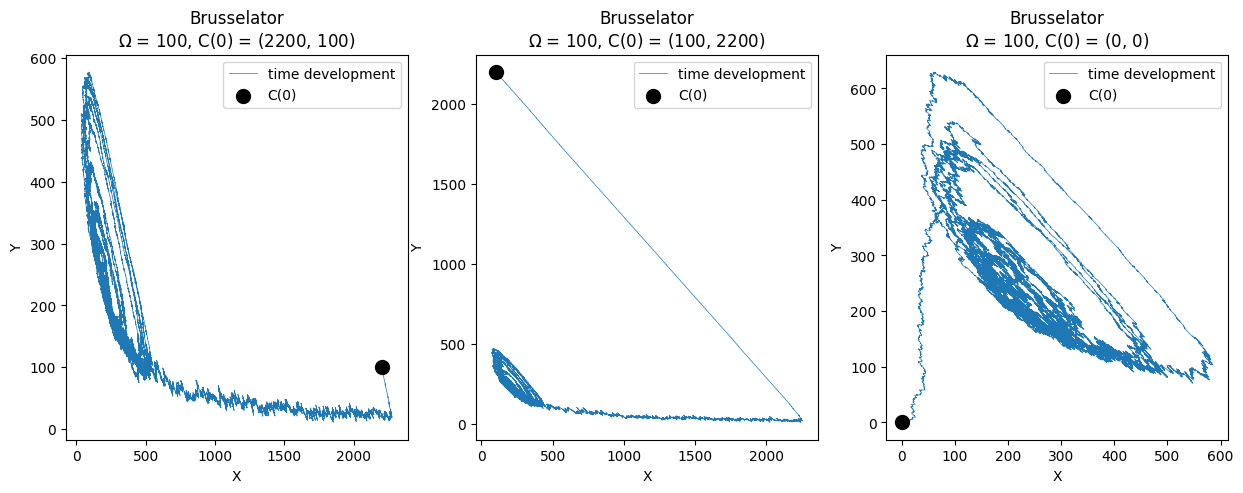

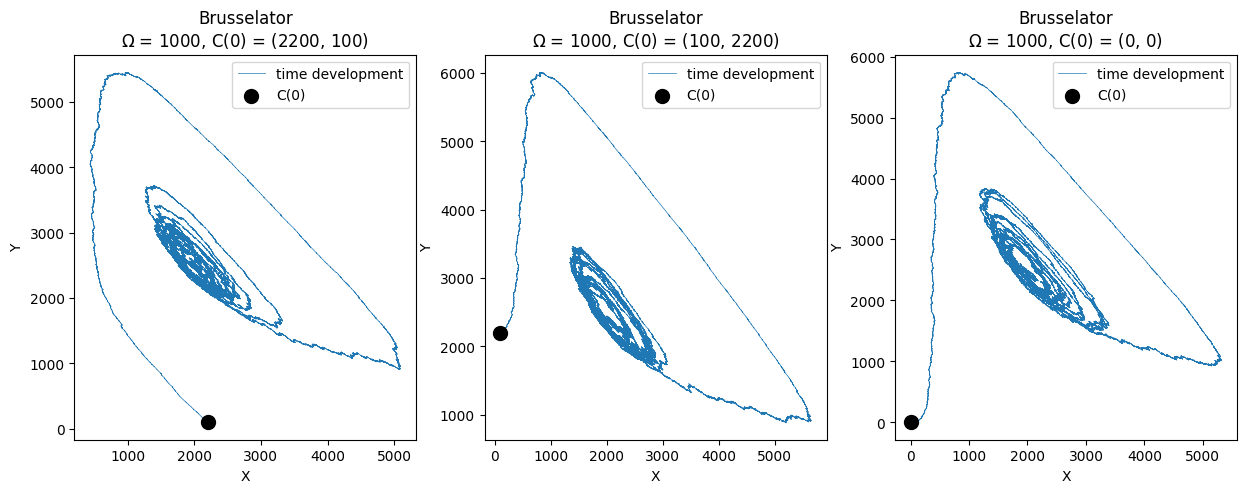

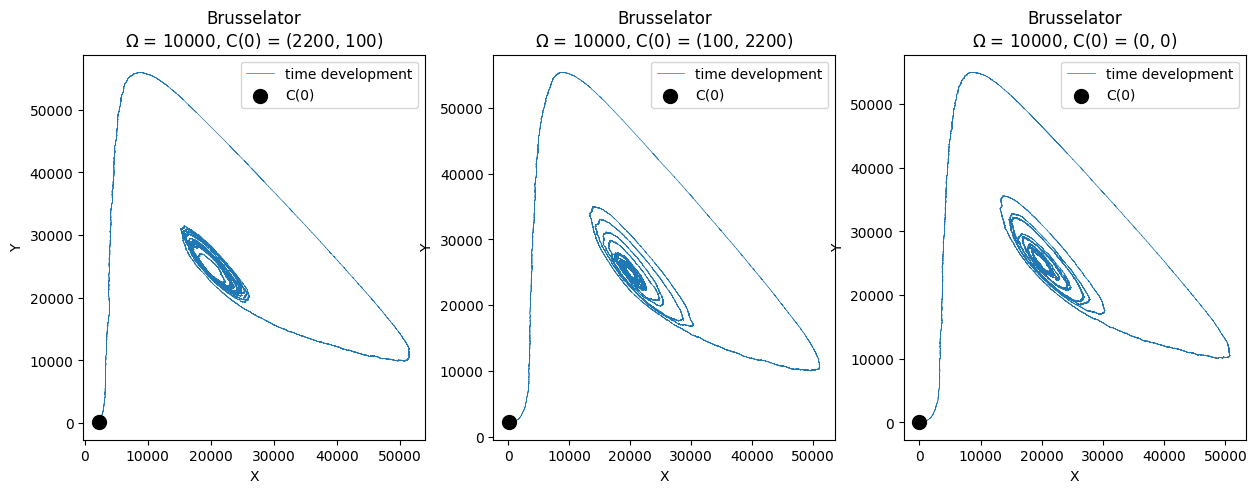

In [138]:
x_vec = [2200, 100, 0]
y_vec = [100, 2200, 0]
omega_vec = [100, 1000, 10000]

for omega in omega_vec:
    fig_x_y, axes_x_y = plt.subplots(1, 3, figsize=(15, 5))
    for i in range(3):
        plot_x_y(x_vec[i], y_vec[i], omega, axes_x_y[i])
plt.show()

#### Comments Brusselator

By increasing the omega parameter, one increases the volume, which allows more particles to form. This comes from $w_1 \propto  \Omega$, the "birth" of x particles increases proportionally with the volume.

It is worth noticing that no matter what the initial conditions are, the model goes towards the same oscillations after some time.